# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/isaacsoong/Desktop/British Airways/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df['num_passengers'].value_counts()

num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64

Lets try to predicted based on our knowledge of what might be correlated to whether or not someone will complete their booking, such as 'number of passengers', 'purchase_lead', 'flight day', 'extra baggage'.

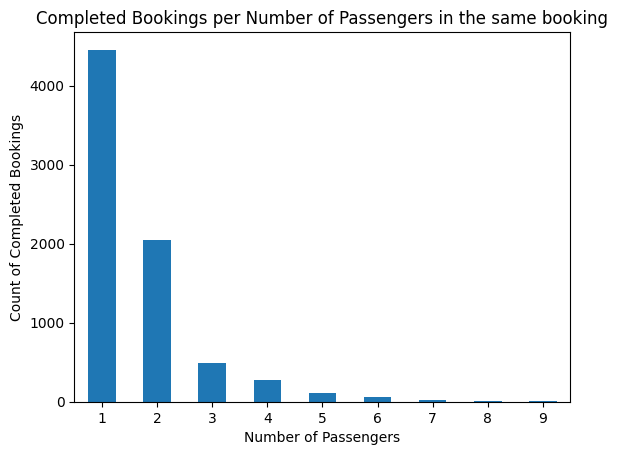

In [10]:
# Filter the dataframe for booking_complete = True
df_complete = df[df["booking_complete"] == True]

# Group by num_passengers and count the occurrences
grouped_by_num_passengers = df_complete.groupby("num_passengers").size()

# Plot the results
grouped_by_num_passengers.plot(kind='bar')
plt.xlabel('Number of Passengers')
plt.ylabel('Count of Completed Bookings')
plt.title('Completed Bookings per Number of Passengers in the same booking')
plt.xticks(rotation = 0)
plt.show()

From the visualisation, we can tell that people who do a booking with less number of passengers are more likely to complete the booking. This could be because they do not have to coordinate between many people, resulting in easier booking confirmation.

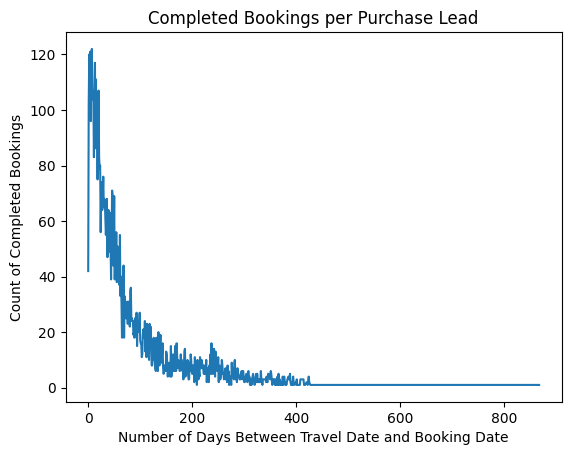

In [11]:
# Group by purchase_lead and count the occurrences
grouped_by_purchase_lead = df_complete.groupby("purchase_lead").size()

# Plot the results
grouped_by_purchase_lead.plot(kind='line')
plt.xlabel('Number of Days Between Travel Date and Booking Date')
plt.ylabel('Count of Completed Bookings')
plt.title('Completed Bookings per Purchase Lead')
plt.xticks(rotation = 0)
plt.show()

From the above visualisation, we can tell that a shorter purchase lead has a higher probability for a completed booking. This could be because they have less time to decide.

flight_day
1    1204
2    1129
3    1252
4    1122
5     983
6     861
7     927
dtype: int64


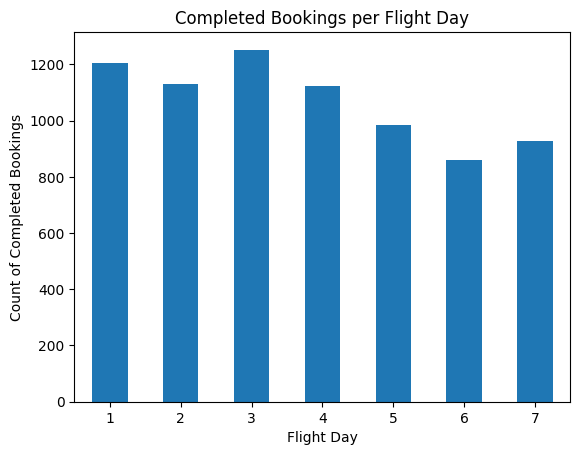

In [12]:
# Group by flight_day and count the occurrences
grouped_by_flight_day = df_complete.groupby("flight_day").size()
print(grouped_by_flight_day)
# Plot the results
grouped_by_flight_day.plot(kind='bar')
plt.xlabel('Flight Day')
plt.ylabel('Count of Completed Bookings')
plt.title('Completed Bookings per Flight Day')
plt.xticks(rotation = 0)
plt.show()

wants_extra_baggage
0    1905
1    5573
dtype: int64


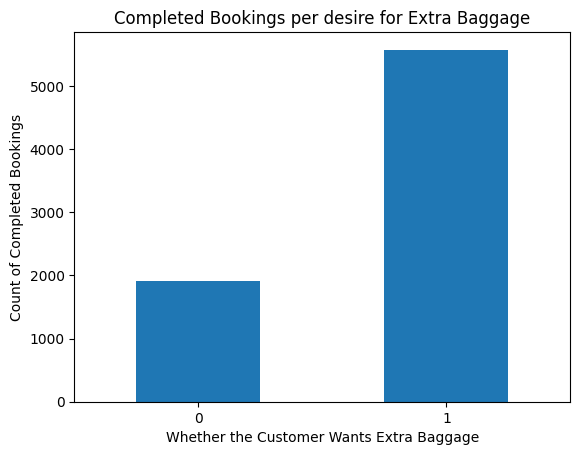

In [13]:
# Group by wants_extra_baggage and count the occurrences
grouped_by_wants_extra_baggage = df_complete.groupby("wants_extra_baggage").size() 
print(grouped_by_wants_extra_baggage)
# Plot the results
grouped_by_wants_extra_baggage.plot(kind='bar')
plt.xlabel('Whether the Customer Wants Extra Baggage')
plt.ylabel('Count of Completed Bookings')
plt.title('Completed Bookings per desire for Extra Baggage')
plt.xticks(rotation = 0)
plt.show()

Now lets compare that to the mutual information score.

The mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. A higher score means a higher dependency, and the higher the importance.

In [14]:
X = df.drop(columns=["booking_complete"])
Y = df["booking_complete"]

In [15]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [16]:
from sklearn.feature_selection import mutual_info_classif as mic
mi_scores = mic(X, Y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores 

route                    0.054504
booking_origin           0.045992
flight_duration          0.018156
length_of_stay           0.011164
wants_extra_baggage      0.010421
num_passengers           0.004696
purchase_lead            0.004614
wants_in_flight_meals    0.004554
sales_channel            0.002843
trip_type                0.000968
wants_preferred_seat     0.000731
flight_hour              0.000340
flight_day               0.000000
Name: MI Scores, dtype: float64

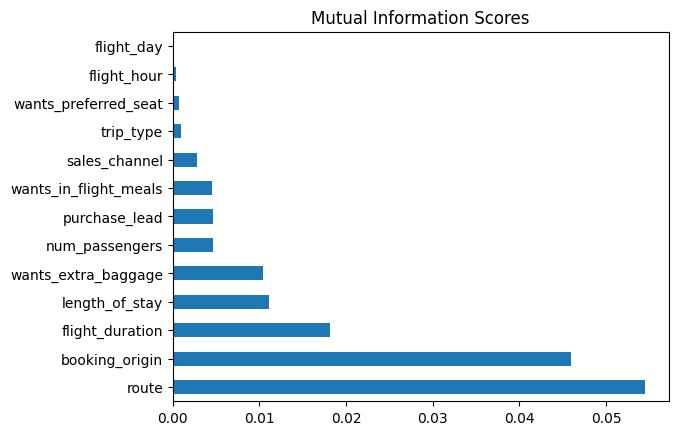

In [17]:
mi_scores.plot(kind='barh')
plt.title("Mutual Information Scores")
plt.show()

We can see that route, booking_origin, flight_duration, wants_extra_baggage, length_of_stay are the top 5 factors affecting
the completion of booking.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler


In [19]:
def train_model(X, Y):
    X_train_full, X_val, Y_train_full, Y_val = train_test_split(X, Y, test_size=0.2, random_state=0)

    # Do train test split on validation set
    X_train, X_test, Y_train, Y_test = train_test_split(X_train_full, Y_train_full, test_size=0.2, random_state=0)
    return (X_train, X_val, Y_train, Y_val)
    

In [20]:
''' 
MinMaxScaler scales the data so that it is in the range of [0, 1]. 
It is useful when the distribution of the data is not Gaussian or when you want to preserve 
the relationships between the variables' values. 
''' 

from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

In [21]:
top_3_features = ['route','booking_origin','flight_duration']

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


# Select top 3 features
W = df[top_3_features]
W = pd.get_dummies(W, columns=top_3_features)
W = scale(W)
Y = df['booking_complete']       

# Train-test split
W_train, W_val, y_train, y_val = train_model(W, Y)

# Train the Random Forest model
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(W_train, y_train)
pred = forest_model.predict(W_val)

# Calculate metrics
accuracy = accuracy_score(y_val, pred)
conf_matrix1 = confusion_matrix(y_val, pred)
roc_auc = roc_auc_score(y_val,pred)

print('Accuracy: ', accuracy * 100)
print('AUC score: ',roc_auc)
print('Confusion Matrix:\n', conf_matrix1)


Accuracy:  84.42
AUC score:  0.5190733372318349
Confusion Matrix:
 [[8362  125]
 [1433   80]]


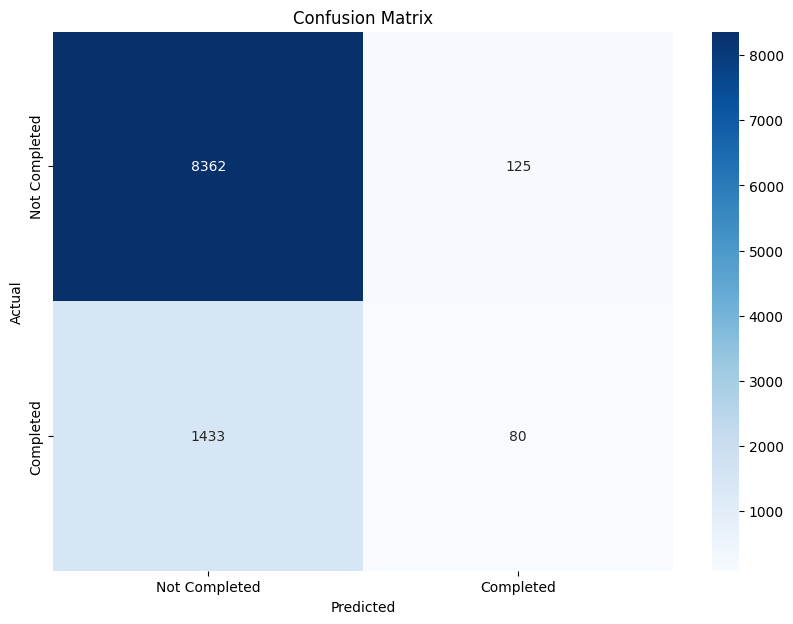

In [23]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Completed', 'Completed'], yticklabels=['Not Completed', 'Completed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
top_5_features = ['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']

Random Forest Classifier with top 5 features.

In [30]:
X = df[top_5_features]
X = pd.get_dummies(X, columns=top_5_features)
X = scale(X)
Y = df['booking_complete']       

X_train, X_val, y_train, y_val = train_model(X, Y)

# Train the Random Forest model
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
pred = forest_model.predict(X_val)

# Calculate metrics
accuracy = accuracy_score(y_val, pred)
conf_matrix2 = confusion_matrix(y_val, pred)
roc_auc = roc_auc_score(y_val,pred)

print('Accuracy: ', accuracy * 100)
print('AUC score: ',roc_auc)
print('Confusion Matrix:\n', conf_matrix2)

Accuracy:  83.6
AUC score:  0.569368213007398
Confusion Matrix:
 [[8077  410]
 [1230  283]]


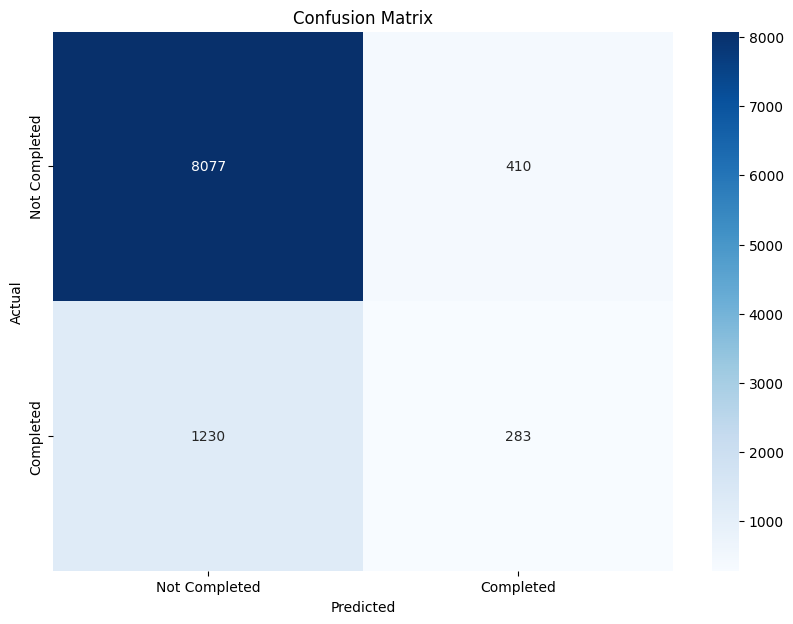

In [26]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Completed', 'Completed'], yticklabels=['Not Completed', 'Completed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Classifier with all features.

In [31]:
Z = df.drop(columns=["booking_complete"])
Z = pd.get_dummies(Z)
Z = scale(Z)
Y = df['booking_complete']       

# Train-test split
Z_train, Z_val, y_train, y_val = train_model(Z, Y)

# Train the Random Forest model
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(Z_train, y_train)
pred = forest_model.predict(Z_val)

# Calculate metrics
accuracy = accuracy_score(y_val, pred)
conf_matrix3 = confusion_matrix(y_val, pred)
roc_auc = roc_auc_score(y_val,pred)


print('Accuracy: ', accuracy * 100)
print('AUC score: ',roc_auc)
print('Confusion Matrix:\n', conf_matrix3)

Accuracy:  84.82
AUC score:  0.5567321149230917
Confusion Matrix:
 [[8272  215]
 [1303  210]]


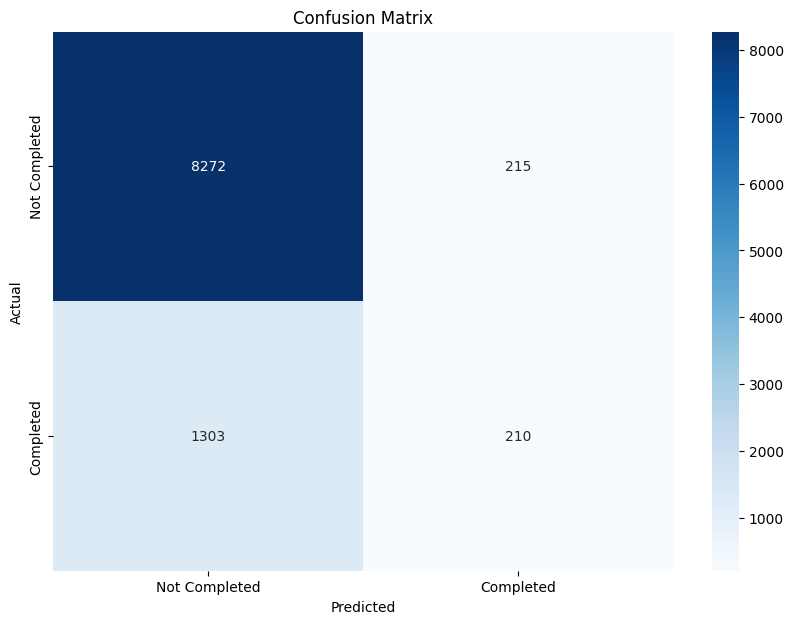

In [28]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Completed', 'Completed'], yticklabels=['Not Completed', 'Completed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The Random Forest Classification with all features turn out to be the best because the accuracy is highest.

Validating with test data set



In [32]:
X = df.drop('booking_complete',axis=1)
X = pd.get_dummies(X)
X = scale(X)
Y = df['booking_complete']      

X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train_full, Y_train_full)
preds= forest_model.predict(X_test)

print('ACCURACY: ',accuracy_score(Y_test,preds)*100)
print('AUC score: ',roc_auc_score(Y_test,preds))

ACCURACY:  85.26
AUC score:  0.565841649967981
